 <div role="main"><span id="maincontent"></span><h2>Zadanie 2.1. Regresja liniowa wielu zmiennych</h2><div data-region="activity-information" data-activityname="Zadanie 2.1. Regresja liniowa wielu zmiennych" class="activity-information">
    </div><div id="intro" class="box py-3 generalbox boxaligncenter"><div class="no-overflow"><p></p><div><div><div><p>Stwórz model regresji liniowej dla cen mieszkań w Poznaniu. Zestaw danych to 5000 ogłoszeń z serwisu&nbsp;<em>gratka.pl</em>.</p><p>Miarą błędu na danych testowych niech będzie średnia kwadratowa błędu (<em>Mean Squared Error, RMSE</em>) dla cen mieszkań.</p><p>Plik <i>gratkapl.csv&nbsp;</i>zawiera dane, na których należy zbudować model regresyjny. Pierwszy wiersz w pliku to nagłówek zawierający opisy kolumn:</p><ul><li>Id - numer porządkowy oferty</li><li>Expected - cena mieszkania</li><li>Rooms - liczba pokojów</li><li>SqrMeters - metraż mieszkania w m<sup>2</sup></li><li>Floor - piętro</li><li>Location - dzielnica lub adres w Poznaniu</li><li>Description - fragment opisu mieszkania</li></ul><p>Wykorzystaj <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression">gotowy model z pakietu scikit-learn</a>.</p><h3 id="Część-podstawowa-(4-punkty)">Część podstawowa (4 punkty)</h3><p>Podziel dane źródłowe na dwa zbiory:</p><ul><li>zbiór uczący, zawierający 4000 przykładów</li><li>zbiór testowy, zawierajacy 1000 przykładów</li></ul><p>Pamiętaj, że dane są „surowe”, więc mogą zawierać obserwacje odstające – dobrze by było je usunąć przed przystąpieniem do budowy modelu.</p><p>Napisz algorytm, który przewidzi cenę mieszkania na podstawie trzech spośród powyższych cech (liczba pokojów, metraż, piętro) – użyj w tym celu regresji liniowej wielu zmiennych. Wytrenuj algorytm na danych ze zbioru uczącego.</p><p>Przetestuj algorytm na danych ze zbioru testowego, obliczając błąd średniokwadratowy (MSE) między cenami mieszkań ze zbioru testowego a cenami mieszkań obliczonymi na podstawie danych ze zbioru testowego.</p></div></div></div><div><div><div><h3 id="Część-zaawansowana-(2-punkty)">Część zaawansowana (3 punkty)</h3><p>Oprócz oczywistych cech numerycznych jak metraż, cechy mogą być symbolicznymi cechami opisującymi występowanie wyrazów lub kombinacjami kilku cech. Zaprojektuj w ten sposób co najmniej trzy nowe cechy i wykorzystaj je do budowy modelu regresji liniowej wielu zmiennych w połączeniu z cechami, których użyłeś w części podstawowej tego zadania.</p><p>Porównaj uzyskany błąd średniokwadratowy na zbiorze testowym z błędem obliczonym w części podstawowej tego zadania.</p></div></div></div><p></p></div><div id="assign_files_tree64558385b82ff1"><ul><li yuiConfig='{"type":"html"}'><div><div class="fileuploadsubmission"> <a target="_blank" href="https://lms.amu.edu.pl/sci/pluginfile.php/16598/mod_assign/introattachment/0/gratkapl.csv?forcedownload=1">gratkapl.csv</a>   </div><div </div></div></li></ul></div></div><div class="gradingsummary"><div class="box py-3 boxaligncenter gradingsummarytable"><table class="generaltable">


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv("gratkapl.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           5000 non-null   int64  
 1   Expected     5000 non-null   int64  
 2   Rooms        5000 non-null   int64  
 3   SqrMeters    5000 non-null   float64
 4   Floor        5000 non-null   int64  
 5   Location     5000 non-null   object 
 6   Description  5000 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 273.6+ KB
None


In [4]:
print(df.describe())

                Id      Expected        Rooms    SqrMeters        Floor
count  5000.000000  5.000000e+03  5000.000000  5000.000000  5000.000000
mean   2500.500000  3.451469e+05     2.457400    56.954076     2.978000
std    1443.520003  9.029668e+05     0.921496    22.886218     2.473123
min       1.000000  1.000000e+00     1.000000    14.370000     1.000000
25%    1250.750000  2.390000e+05     2.000000    42.215000     1.000000
50%    2500.500000  2.935730e+05     2.000000    51.300000     2.000000
75%    3750.250000  3.570450e+05     3.000000    65.212500     4.000000
max    5000.000000  3.637840e+07    10.000000   257.000000    16.000000


In [5]:
pd.set_option("display.max_columns", None)
print(df.head(10))

   Id  Expected  Rooms  SqrMeters  Floor  \
0   1    269000      3      55.00      1   
1   2    320000      3      79.00     10   
2   3    146000      1      31.21      1   
3   4    189000      2      44.00      2   
4   5    480240      2      65.25      1   
5   6    485500      2      56.00      1   
6   7    299000      2      26.80      1   
7   8    380000      3      63.90      4   
8   9    340000      2      59.00      1   
9  10    207076      2      43.10      2   

                                            Location  \
0                                      Poznań Zawady   
1                     Poznań Rataje ul. Orła Bialego   
2  Poznań Nowe Miasto ul. Kawalerka W Nowym Bloku...   
3  Poznań Grunwald Ogrody Jeżyce Centrum Łazarz u...   
4                       Poznań ul. Droga Dębińska 19   
5                     Poznań Winogrady ul. Winogrady   
6                            Poznań Wilda ul. Różana   
7                                    Poznań Piątkowo   
8          

In [6]:
# Outliery

numeric_cols = ["Expected", "SqrMeters", "Floor"]

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

outlier_counts = {col: count_outliers(df[col].dropna()) for col in numeric_cols}

for col, count in outlier_counts.items():
    print(f"{col}: {count} outlierów")

Expected: 325 outlierów
SqrMeters: 295 outlierów
Floor: 252 outlierów


In [7]:
df.nlargest(20, "Expected")

,Id,Expected,Rooms,SqrMeters,Floor,Location,Description
745,746,36378404,3,48.70,4,Poznań Winogrady ul. Wilczak 20,Mieszkanie 3 pokojowe z aneksem kuchennym.
1314,1315,30542880,1,31.52,1,Poznań Stare Miasto ul. Dominikańska,Zapraszamy do zapoznania się z nową inwestycją...
1173,1174,29979840,2,54.40,4,Poznań Winogrady ul. Wilczak 20,Mieszkanie 2 pokojowe z aneksem kuchennym.
4878,4879,29979840,2,54.40,1,Poznań Winogrady ul. Wilczak 20,Mieszkanie 2 pokojowe z aneksem kuchennym.
3620,3621,3740000,6,219.78,3,Poznań Centrum,JEDYNY TAKI PENTHOUSE W POZNANIU! Centrum ale ...
4239,4240,1790000,3,121.00,3,Poznań Grunwald ul. Stanisława Wyspiańskiego,PIĘKNY APARTAMENT NA SPRZEDAŻ ul.Wyspiańskiego...
3470,3471,1591000,2,100.00,1,Poznań Grunwald ul. Wyspiańskiego,Przytulne mieszkanie na pierwszym piętrze w ap...
705,706,1539000,4,114.00,1,Poznań Grunwald ul. Zbąszyńska,Na sprzedaż piękne i przestronne mieszkanie w ...
2309,2310,1350000,3,150.00,1,Poznań Ogrody,| Luksusowe mieszkanie na Ogrodach - w samym s...
1454,1455,1300000,3,130.00,2,Poznań Centrum Rataje ul. Mostowa Falowiec Wst...,Polecam do sprzedaży apartament o powierzchni ...


In [8]:
# usuwanie 4 największych obserwacji

df = df.sort_values(by="Expected", ascending=False).iloc[4:].reset_index(drop=True)
df.nsmallest(20, "Expected")

,Id,Expected,Rooms,SqrMeters,Floor,Location,Description
4995,972,1,5,99.76,1,Poznań Kameralne Osiedle Domów Energooszczędny...,Oferujemy Państwu wspaniały dom z ogródkiem id...
4994,4529,4000,3,85.50,2,Poznań ul. Ułańska,Biuro Noble Estate zaprasza do zapoznania się ...
4993,1176,68000,1,33.10,1,Poznań Naramowice ul. Naramowicka,Odstąpię mieszkanie w TBS przy Naramowickiej. ...
4992,4890,79000,2,38.10,10,Poznań Nowe Miasto ul. Katowicka,MIESZKANIE-TBS!!! Kawalerka 28m2 79.000zł Cena...
4991,471,85000,1,37.00,3,Poznań Nowe Miasto ul. Folwarczna,MIESZKANIE-TBS!!! kawalerka 37m2 85.000zł Cena...
4990,899,90000,1,24.26,4,Poznań Jeżyce ul. Szamarzewskiego,Słoneczne mieszkanie na czwartym piętrze (podd...
4989,2056,94000,2,54.00,2,Poznań Okolica Rybno Rybno ul. Kłecko,O K A Z J A Mieszkanie w Rybnie Wielkim w odle...
4987,3551,98000,2,53.00,2,Poznań Koziegłowy ul. Os. Leśne,MIESZKANIE-TBS!!! 2 pokoje 53 0m2 98.000zł Cen...
4988,4724,98000,2,50.00,1,Poznań Wilda ul. Robocza/Sikorskiego,Mieszkanie TBS Poznań ul.Robocza/Sikorskiego z...
4983,302,99000,1,22.76,1,Poznań Golęcin ul. Szydłowska 41,UNIWERSYTET PRZYRODNICZY W POZNANIU OGŁASZA PR...


In [9]:
# usuwanie 2 najmniejszych obserwacji

df = df.sort_values(by="Expected", ascending=True).iloc[2:]

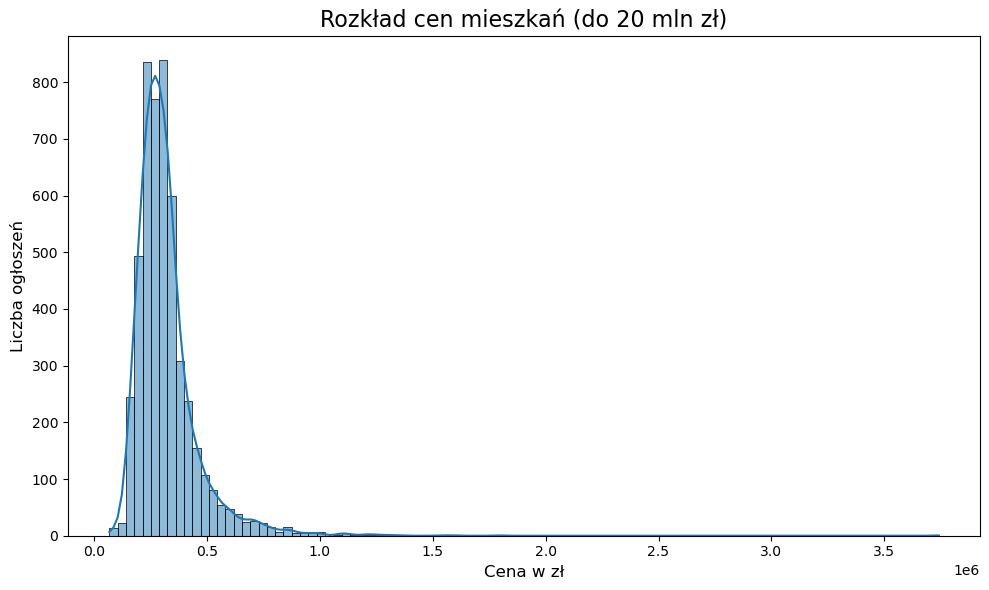

In [10]:
# rozklad zmiennej expected

import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[df["Expected"] <= 20000000]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["Expected"], bins=100, kde=True)
plt.title("Rozkład cen mieszkań (do 20 mln zł)", fontsize=16)
plt.xlabel("Cena w zł", fontsize=12)
plt.ylabel("Liczba ogłoszeń", fontsize=12)
plt.tight_layout()
plt.show()

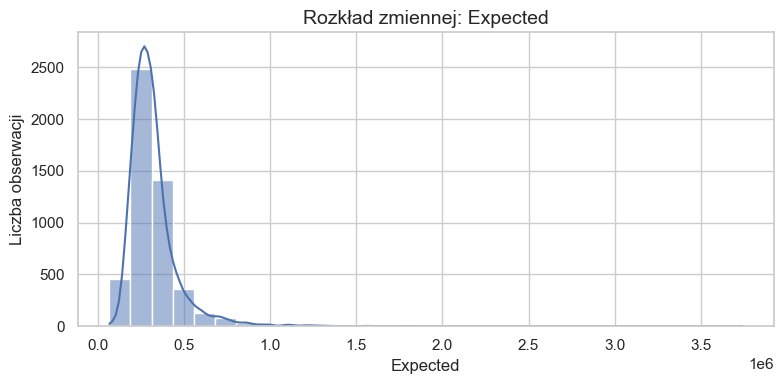

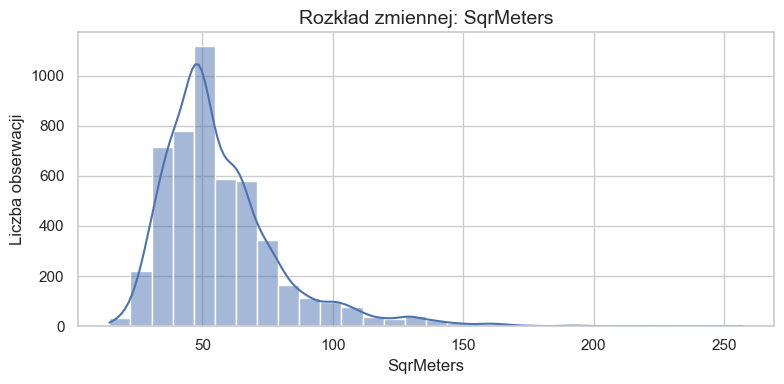

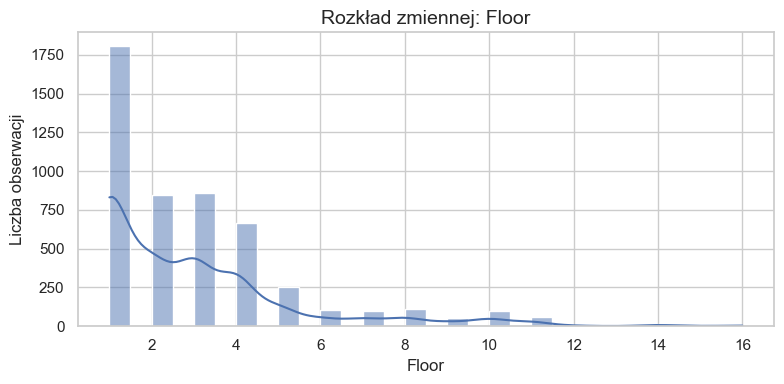

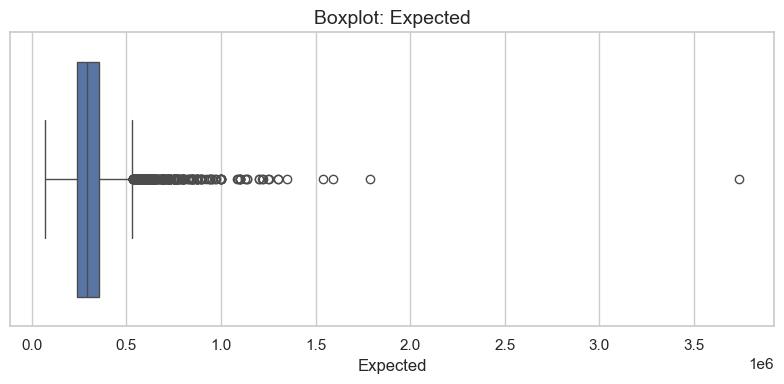

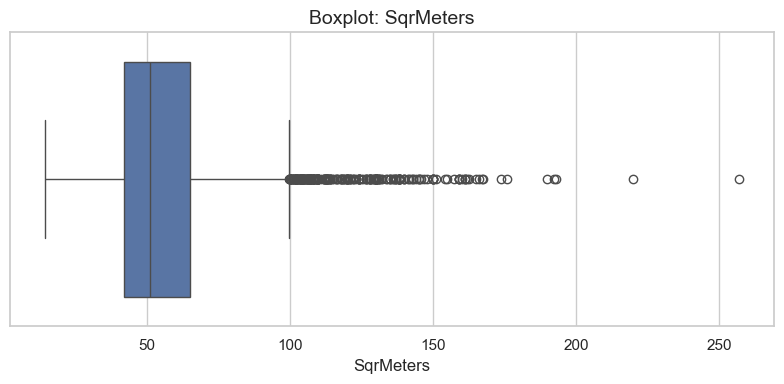

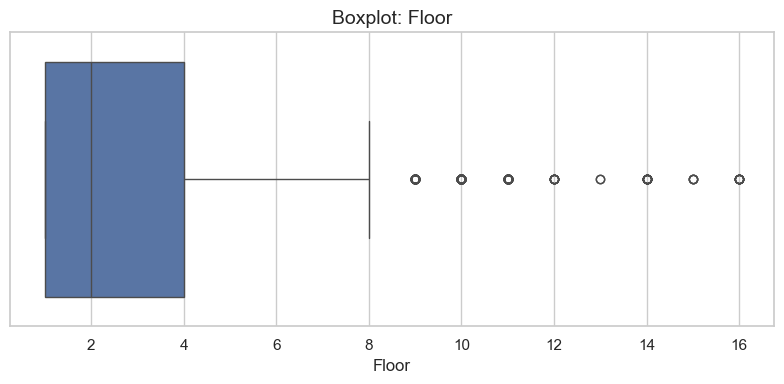

In [11]:
# rozkład zmiennych

sns.set(style="whitegrid")
plt.rcParams.update({"figure.figsize": (8, 4), "axes.titlesize": 14})

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Rozkład zmiennej: {col}")
    plt.xlabel(col)
    plt.ylabel("Liczba obserwacji")
    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Model regresji

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

features = ["Rooms", "SqrMeters", "Floor"]
X = df[features]
y = df["Expected"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=4000, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse_basic = mean_squared_error(y_test, y_pred)
print(f"Błąd MSE (część podstawowa): {mse_basic:.2f}")

Błąd MSE (część podstawowa): 7404721760.06


## Część zaawansowana 

In [15]:
df["LogSqrMeters"] = np.log1p(df["SqrMeters"])
df["IsGroundFloor"] = (df["Floor"] == 0).astype(int)
df["HasLuxuryKeywords"] = df["Description"].str.lower().str.contains("luksus|nowy|klimatyzacja").astype(int)

advanced_features = ["Rooms", "SqrMeters", "Floor", "LogSqrMeters", "IsGroundFloor", "HasLuxuryKeywords"]

X_adv = df[advanced_features]
y_adv = df["Expected"]
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, train_size=4000, random_state=42)


In [16]:
model_adv = LinearRegression()
model_adv.fit(X_train_adv, y_train_adv)
y_pred_adv = model_adv.predict(X_test_adv)

mse_advanced = mean_squared_error(y_test_adv, y_pred_adv)
print(f"Błąd MSE (część zaawansowana): {mse_advanced:.2f}")


Błąd MSE (część zaawansowana): 7319143303.80


In [17]:
print(f"Poprawa MSE: {mse_basic - mse_advanced:.2f}")


Poprawa MSE: 85578456.26


 <div role="main"><span id="maincontent"></span><h2>Zadanie 2.2. Regresja logistyczna</h2><div data-region="activity-information" data-activityname="5. Regresja logistyczna" class="activity-information">
    <div data-region="activity-dates" class="mb-1">
                </div>
</div><div id="intro" class="box py-3 generalbox boxaligncenter"><div class="no-overflow"><p></p><div><div><div><h3>Część podstawowa (4 punkty)</h3><p>Plik <em>mieszkania4.tsv&nbsp;</em>zawiera dane dotyczące mieszkań.</p><p>Zamiast przywidywania ceny mieszkania, spróbuj&nbsp;za pomocą regresji logistycznej przewidzieć, czy mieszkanie znajduje się w bloku, czy nie (innymi słowy: czy cecha <em>Typ zabudowy</em> ma wartość <em>blok</em>).</p><p><span style="font-size: 0.9375rem;">Stwórz dwuklasowy model regresji logistycznej, korzystając z cech liczbowych&nbsp;</span><em style="font-size: 0.9375rem;">Rok budowy</em><span style="font-size: 0.9375rem;"> i </span><em style="font-size: 0.9375rem;">Powierzchnia w m2</em><span style="font-size: 0.9375rem;">.&nbsp;</span></p><p><span style="font-size: 0.9375rem;">Pamiętaj o podziale zbioru danych na dane treningowe (4/5 danych) i testowe (1/5 danych). Warto też usunąć obserwacje odstające i dokonać normalizacji danych.</span></p><p><span style="font-size: 0.9375rem;">Podaj procent poprawnych wyników (tzw. skuteczność,&nbsp;</span><em style="font-size: 0.9375rem;">accuracy</em><span style="font-size: 0.9375rem;">) dla zestawu testowego.</span></p><h3><span style="color: inherit; font-family: inherit; font-size: 1.64062rem;">Część zaawansowana (3 punkty)</span></h3></div></div></div><div><div><div><p>Zaimplementuj klasyfikator losowy (czyli taki, który przyporządkowuje losową wartość 0 lub 1 z prawdopodobieństem 1/2).</p><p>Porównaj oba modele pod względem skuteczności (<em>accuracy</em>), precyzji (<em>precision</em>), czułości (<em>recall</em>) i <em>F-score</em>.</p><p><b>Wskazówki</b>:</p><ul><li><span style="font-size: 0.9375rem;">Regresję logistyczną można zaimplementować, korzystając z gotowych modeli, np. z pakietu&nbsp;</span><em style="font-size: 0.9375rem;"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression">scikit-learn</a></em><span style="font-size: 0.9375rem;">.</span></li><li><span style="font-size: 0.9375rem;">Kolumnę etykiet można stworzyć pojedynczą linijką kodu:</span></li><ul><li><div><pre>data["Czy blok"] = (data["Typ zabudowy"] == "blok")</pre></div><span style="font-size: 0.9375rem;"></span></li></ul><li>Do podziału danych można wykorzystać metodę <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split"><em>train_test_split</em></a>.</li><li>Do normalizacji i skalowania można wykorzystać narzędzie&nbsp;<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" style="background-color: rgb(255, 255, 255); font-size: 0.9375rem;"><em>StandardScaler</em></a><span style="font-size: 0.9375rem;">&nbsp;z biblioteki&nbsp;</span><em style="font-size: 0.9375rem;">scikit-learn:</em></li><pre><ul><li>scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)</li></ul></pre><li>Do odrzucenia wartości niezdefiniowanych (NaN) można wykorzystać metodę&nbsp;<em style="font-size: 0.9375rem;"><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html">dropna</a></em><span style="font-size: 0.9375rem;">&nbsp;z biblioteki&nbsp;</span><em style="font-size: 0.9375rem;"><a href="https://pandas.pydata.org/docs/index.html">pandas</a></em><span style="font-size: 0.9375rem;">.</span></li><li><span style="font-size: 0.9375rem;">Do ewaluacji można wykorzystać metody z modułu <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics"><em>sklearn.metrics</em></a>, np.:</span></li><ul><li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score"><em>accuracy_score</em></a></li><li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support"><em>precision_recall_fscore_support</em></a><span style="font-size: 0.9375rem;"></span></li><li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report"><em>classification_report</em></a><br></li></ul><li>Klasyfikator losowy można zaimplementować pojedynczą linijką kodu:</li><pre><ul><li><span style="font-size: 0.9375rem;">numpy.random.randint(0, 2, m)</span></li></ul></pre></ul><p></p></div></div></div><p></p></div><div id="assign_files_tree645581ef2b6a61"><div class="ygtvitem" id="ygtv0"><div class="ygtvchildren" id="ygtvc0"><div class="ygtvitem" id="ygtv1"><table id="ygtvtableel1" border="0" cellpadding="0" cellspacing="0" class="ygtvtable ygtvdepth0 ygtv-expanded ygtv-highlight0"><tbody><tr class="ygtvrow"><td class="ygtvcell ygtvln"><div class="ygtvspacer"></div></td><td id="ygtvcontentel1" class="ygtvcell ygtvhtml ygtvcontent"><div><div class="fileuploadsubmission"> <a target="_blank" href="https://lms.amu.edu.pl/sci/pluginfile.php/16599/mod_assign/introattachment/0/mieszkania4.tsv?forcedownload=1">mieszkania4.tsv</a>   

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv("mieszkania4.tsv", sep="\t")

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cena                       4938 non-null   int64  
 1   Powierzchnia w m2          4938 non-null   int64  
 2   Liczba pokoi               4938 non-null   int64  
 3   Miejsce parkingowe         4938 non-null   bool   
 4   Garaż                      4938 non-null   bool   
 5   Liczba pięter w budynku    4788 non-null   float64
 6   Piętro                     4359 non-null   object 
 7   Typ zabudowy               3981 non-null   object 
 8   Okna                       3057 non-null   object 
 9   Materiał budynku           2067 non-null   object 
 10  Rok budowy                 1955 non-null   float64
 11  Forma własności            2090 non-null   object 
 12  Forma kuchni               1624 non-null   object 
 13  Stan                       1193 non-null   objec

In [21]:
print(df.describe())


               cena  Powierzchnia w m2  Liczba pokoi  Liczba pięter w budynku  \
count  4.938000e+03        4938.000000   4938.000000              4788.000000   
mean   4.198150e+05          76.422033      2.844674                 5.315163   
std    3.244901e+05         180.583310      1.247389                 3.638266   
min    0.000000e+00          15.000000      1.000000                 1.000000   
25%    2.824200e+05          45.000000      2.000000                 3.000000   
50%    3.417040e+05          54.000000      3.000000                 4.000000   
75%    4.500000e+05          72.000000      3.000000                 5.000000   
max    1.000000e+07       11930.000000      8.000000                18.000000   

        Rok budowy  Powierzchnia działki w m2  
count  1955.000000                 526.000000  
mean   1984.839898                1260.515209  
std      34.007728               13082.350460  
min    1862.000000                  20.000000  
25%    1970.000000            

In [22]:
df.nlargest(5, "Powierzchnia w m2")

,cena,Powierzchnia w m2,Liczba pokoi,Miejsce parkingowe,Garaż,Liczba pięter w budynku,Piętro,Typ zabudowy,Okna,Materiał budynku,Rok budowy,Forma własności,Forma kuchni,Stan,Stan instalacji,Głośność,Droga dojazdowa,Stan łazienki,Powierzchnia działki w m2,opis
3113,3000000,11930,4,False,False,3.0,NaN,NaN,NaN,cegła,2001.0,NaN,NaN,NaN,NaN,NaN,utwardzana,NaN,11930.0,W naszej ofercie nietypowa nieruchomość na ska...
840,1600000,1200,6,False,False,3.0,NaN,NaN,NaN,cegła,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,Do sprzedaży luksusowy dom położony w Szczepan...
2192,4500000,1100,6,True,True,1.0,NaN,NaN,NaN,cegła,2002.0,NaN,NaN,NaN,NaN,NaN,asfaltowa,NaN,6325.0,| Reprezentacyjna rezydencja o pow. blisko 10...
2680,4499999,1100,6,True,True,1.0,NaN,NaN,NaN,cegła,2002.0,NaN,NaN,NaN,NaN,NaN,utwardzana,NaN,6300.0,Oferujemy do sprzedaży reprezentacyjną rezyden...
1123,4600000,855,5,False,False,2.0,NaN,NaN,NaN,NaN,1950.0,NaN,NaN,NaN,NaN,NaN,asfaltowa,NaN,855.0,Do sprzedaży dom wolnostojacy o pow. całkowite...


In [23]:
kolumny = [
    "Liczba pokoi",
    "Miejsce parkingowe",
    "Garaż",
    "Liczba pięter w budynku",
    "Piętro",
    "Typ zabudowy",
    "Okna",
    "Materiał budynku",
    "Rok budowy",
    "Forma własności",
    "Forma kuchni",
    "Stan",
    "Stan instalacji",
    "Głośność",
    "Droga dojazdowa",
    "Stan łazienki"
]

for kol in kolumny:
    print(f"\nUnikalne wartości w kolumnie: {kol}")
    print(df[kol].unique())


Unikalne wartości w kolumnie: Liczba pokoi
[2 3 4 1 5 6 8 7]

Unikalne wartości w kolumnie: Miejsce parkingowe
[False  True]

Unikalne wartości w kolumnie: Garaż
[False  True]

Unikalne wartości w kolumnie: Liczba pięter w budynku
[ 5.  3. 16.  2. 13.  1. nan  7.  8.  4. 15.  6. 10. 12. 11. 14.  9. 18.]

Unikalne wartości w kolumnie: Piętro
['parter' '2' '5' '12' '1' '3' nan '8' '4' '16' '7' '6' 'poddasze' '9'
 '11' '13' '14' '10' '15' 'niski parter']

Unikalne wartości w kolumnie: Typ zabudowy
['apartamentowiec' 'kamienica' 'blok' 'dom wielorodzinny/szeregowiec' nan
 'plomba']

Unikalne wartości w kolumnie: Okna
['plastikowe/PCV' nan 'drewniane']

Unikalne wartości w kolumnie: Materiał budynku
['cegła' 'płyta' nan 'silikat' 'pustak' 'inne' 'beton' 'drewno' 'kamień']

Unikalne wartości w kolumnie: Rok budowy
[2017. 1902. 1990. 2009.   nan 1992. 1963. 1993. 1930. 1960. 2000. 2008.
 2015. 1980. 2018. 1997. 1975. 1995. 2006. 1964. 2011. 1920. 2004. 1970.
 1965. 1985. 1908. 1910. 2007. 19

In [24]:
df["Piętro"] = df["Piętro"].replace({
    "parter": 0,
    "niski parter": 0
})

In [25]:
mask = (df["Piętro"] == "poddasze") & (df["Liczba pięter w budynku"].notna())

df.loc[mask, "Piętro"] = df.loc[mask, "Liczba pięter w budynku"]

df = df[~((df["Piętro"] == "poddasze") & (df["Liczba pięter w budynku"].isna()))]

kolumny = [
    "Liczba pięter w budynku",
    "Piętro"
]

for kol in kolumny:
    print(f"\nUnikalne wartości w kolumnie: {kol}")
    print(df[kol].unique())


Unikalne wartości w kolumnie: Liczba pięter w budynku
[ 5.  3. 16.  2. 13.  1. nan  7.  8.  4. 15.  6. 10. 12. 11. 14.  9. 18.]

Unikalne wartości w kolumnie: Piętro
[0 '2' '5' '12' '1' '3' nan '8' '4' '16' '7' '6' 4.0 '9' '11' '13' '14'
 '10' '15' 5.0 3.0]


In [26]:
df["Liczba pięter w budynku"] = pd.to_numeric(df["Liczba pięter w budynku"], errors='coerce')
df["Piętro"] = pd.to_numeric(df["Piętro"], errors='coerce')
df["Rok budowy"] = pd.to_numeric(df["Rok budowy"], errors='coerce')

df["Liczba pięter w budynku"] = df["Liczba pięter w budynku"].astype("Int64")
df["Piętro"] = df["Piętro"].astype("Int64")
df["Rok budowy"] = df["Rok budowy"].astype("Int64")

df["cena"] = pd.to_numeric(df["cena"], errors='coerce')
df["Powierzchnia w m2"] = pd.to_numeric(df["Powierzchnia w m2"], errors='coerce')
df["Liczba pokoi"] = pd.to_numeric(df["Liczba pokoi"], errors='coerce')

df["cena"] = df["cena"].astype("Int64")
df["Powierzchnia w m2"] = df["Powierzchnia w m2"].astype("Int64")
df["Liczba pokoi"] = df["Liczba pokoi"].astype("Int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cena                       4938 non-null   Int64  
 1   Powierzchnia w m2          4938 non-null   Int64  
 2   Liczba pokoi               4938 non-null   Int64  
 3   Miejsce parkingowe         4938 non-null   bool   
 4   Garaż                      4938 non-null   bool   
 5   Liczba pięter w budynku    4788 non-null   Int64  
 6   Piętro                     4359 non-null   Int64  
 7   Typ zabudowy               3981 non-null   object 
 8   Okna                       3057 non-null   object 
 9   Materiał budynku           2067 non-null   object 
 10  Rok budowy                 1955 non-null   Int64  
 11  Forma własności            2090 non-null   object 
 12  Forma kuchni               1624 non-null   object 
 13  Stan                       1193 non-null   objec

### Model regresji logistycznej

In [28]:
df["czy_blok"] = (df["Typ zabudowy"] == "blok").astype(int)

df = df[["Rok budowy", "Powierzchnia w m2", "czy_blok"]]

df = df.dropna()

for col in ["Rok budowy", "Powierzchnia w m2"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]

X = df[["Rok budowy", "Powierzchnia w m2"]]
y = df["czy_blok"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Skuteczność (accuracy) na zbiorze testowym: {accuracy:.2%}")

Skuteczność (accuracy) na zbiorze testowym: 60.87%


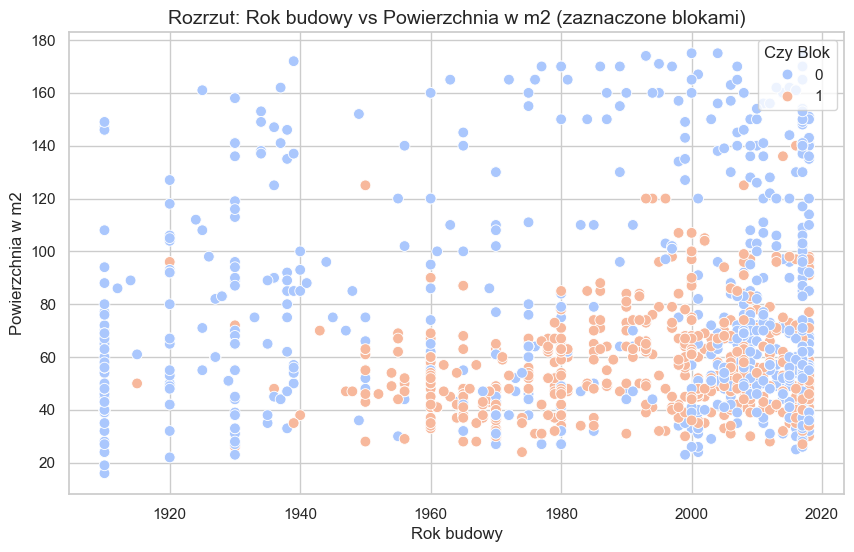

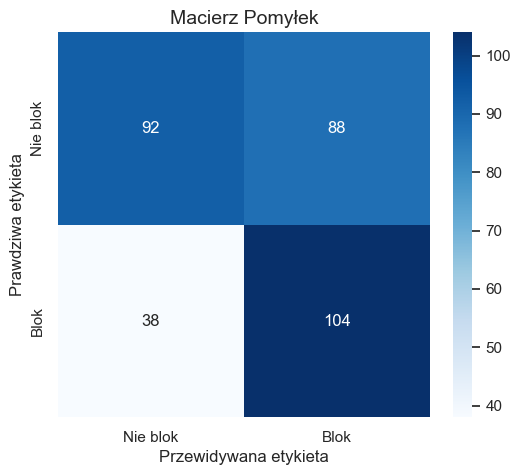

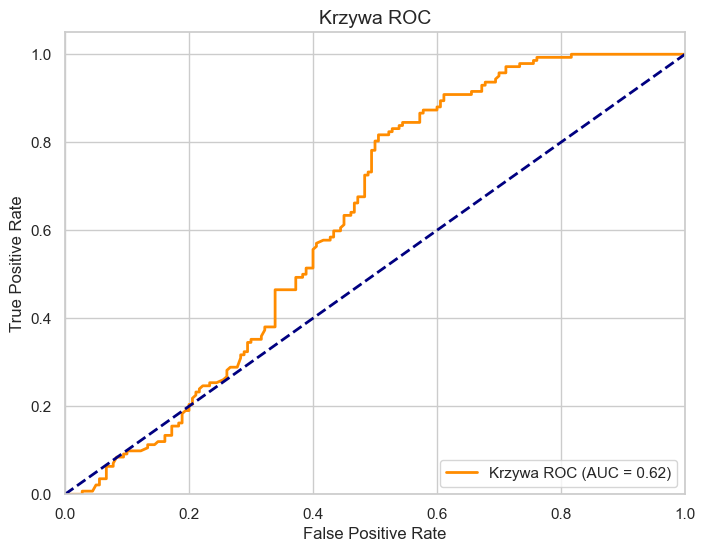

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Rok budowy", y="Powierzchnia w m2", hue="czy_blok", palette="coolwarm", s=60)
plt.title("Rozrzut: Rok budowy vs Powierzchnia w m2 (zaznaczone blokami)")
plt.xlabel("Rok budowy")
plt.ylabel("Powierzchnia w m2")
plt.legend(title="Czy Blok", loc="upper right")
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Nie blok", "Blok"], yticklabels=["Nie blok", "Blok"])
plt.title("Macierz Pomyłek")
plt.ylabel("Prawdziwa etykieta")
plt.xlabel("Przewidywana etykieta")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

## Część zaawansowana

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report


df = df[["Rok budowy", "Powierzchnia w m2", "czy_blok"]]

for col in ["Rok budowy", "Powierzchnia w m2"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]

X = df[["Rok budowy", "Powierzchnia w m2"]]
y = df["czy_blok"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)



# Klasyfikator losowy
y_pred_random = np.random.randint(0, 2, len(y_test))

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision, log_reg_recall, log_reg_fscore, _ = precision_recall_fscore_support(y_test, y_pred_log_reg, average="binary")
random_accuracy = accuracy_score(y_test, y_pred_random)
random_precision, random_recall, random_fscore, _ = precision_recall_fscore_support(y_test, y_pred_random, average="binary")



print("Wyniki dla regresji logistycznej:")
print(f"Accuracy: {log_reg_accuracy:.2%}")
print(f"Precision: {log_reg_precision:.2%}")
print(f"Recall: {log_reg_recall:.2%}")
print(f"F-score: {log_reg_fscore:.2%}")
print("\nWyniki dla klasyfikatora losowego:")
print(f"Accuracy: {random_accuracy:.2%}")
print(f"Precision: {random_precision:.2%}")
print(f"Recall: {random_recall:.2%}")
print(f"F-score: {random_fscore:.2%}")

print("\nKlasyfikacja raport dla regresji logistycznej:")
print(classification_report(y_test, y_pred_log_reg))

print("\nKlasyfikacja raport dla klasyfikatora losowego:")
print(classification_report(y_test, y_pred_random))

Wyniki dla regresji logistycznej:
Accuracy: 62.72%
Precision: 63.47%
Recall: 85.28%
F-score: 72.77%

Wyniki dla klasyfikatora losowego:
Accuracy: 55.91%
Precision: 63.70%
Recall: 57.06%
F-score: 60.19%

Klasyfikacja raport dla regresji logistycznej:
              precision    recall  f1-score   support

           0       0.60      0.31      0.41       116
           1       0.63      0.85      0.73       163

    accuracy                           0.63       279
   macro avg       0.62      0.58      0.57       279
weighted avg       0.62      0.63      0.60       279


Klasyfikacja raport dla klasyfikatora losowego:
              precision    recall  f1-score   support

           0       0.47      0.54      0.51       116
           1       0.64      0.57      0.60       163

    accuracy                           0.56       279
   macro avg       0.56      0.56      0.55       279
weighted avg       0.57      0.56      0.56       279



 <div role="main"><span id="maincontent"></span><h2>Zadanie 2.3. Problem nadmiernego dopasowania</h2><div data-region="activity-information" data-activityname="6. Problem nadmiernego dopasowania" class="activity-information">
    
</div><div id="intro" class="box py-3 generalbox boxaligncenter"><div class="no-overflow"><p></p><h3>Część podstawowa (4 punkty)</h3><p>Plik&nbsp;<em>data6.tsv</em><a role="button" download="" href="https://canvas.instructure.com/courses/1866792/files/92742435/download?download_frd=1">&nbsp;</a>zawiera pewne dane. Zastosuj do nich regresję wielomianową:</p><ol><li>pierwszego stopnia (funkcja liniowa)</li><li>drugiego stopnia (funkcja kwadratowa)</li><li>piątego stopnia (wielomian 5. stopnia)</li></ol><p>Uzyskane krzywe regresji przedstaw na wykresie.</p><h3>Część zaawansowana (3 punkty)</h3><p>Do powyższych danych zastosuj regresję liniową 5. stopnia (wielomian 5. stopnia), ale z regularyzacją.</p><h3>Wskazówki</h3><p></p><ul><li>W pakiecie&nbsp;<em>scikit-learn</em> regresję wielomianową można zaimplementować tworząc cechy wielomianowe za pomocą klasy <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">PolynomialFeatures</a>, a następnie używając <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression </a>do tych cech.</li><li>Regularyzacji można dokonać korzystając z&nbsp;klasy <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">Ridge </a>(<strong>uwaga</strong>: parametr regularyzacji lambda λ tutaj nazywany jest `alpha`).</li></ul><p></p><p></p></div><div id="assign_files_tree6455820cd54531"><div class="ygtvitem" id="ygtv0"><div class="ygtvchildren" id="ygtvc0"><div class="ygtvitem" id="ygtv1"><table id="ygtvtableel1" border="0" cellpadding="0" cellspacing="0" class="ygtvtable ygtvdepth0 ygtv-expanded ygtv-highlight0"><tbody><tr class="ygtvrow"><td class="ygtvcell ygtvln"><div class="ygtvspacer"></div></td><td id="ygtvcontentel1" class="ygtvcell ygtvhtml ygtvcontent"><div><div class="fileuploadsubmission"> <a target="_blank" href="https://lms.amu.edu.pl/sci/pluginfile.php/16600/mod_assign/introattachment/0/data6.tsv?forcedownload=1">data6.tsv</a>  


## Cześć podstawowa

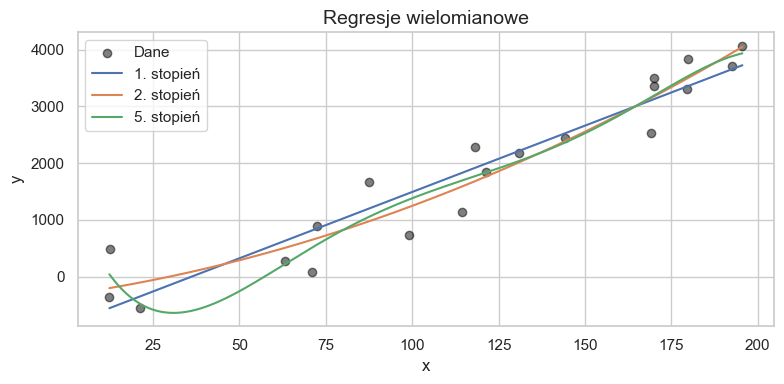

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("data6.tsv", sep="\t", header=None)
df.columns = ["x", "y"]

X = df[["x"]].values
y = df["y"].values

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

def plot_poly_regression(X, y, degree, model, label):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)

    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_pred, label=label)



plt.scatter(X, y, color="black", alpha=0.5, label="Dane")

plot_poly_regression(X, y, degree=1, model=LinearRegression(), label="1. stopień")
plot_poly_regression(X, y, degree=2, model=LinearRegression(), label="2. stopień")
plot_poly_regression(X, y, degree=5, model=LinearRegression(), label="5. stopień")

plt.legend()
plt.title("Regresje wielomianowe")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()

## Część zaawansowana

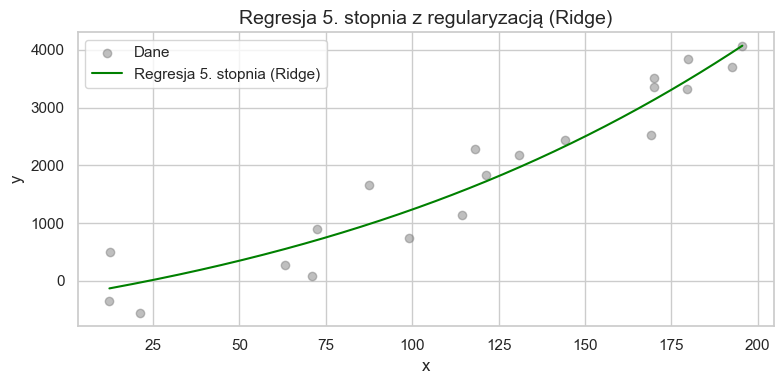

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model_ridge = make_pipeline(PolynomialFeatures(degree=5), StandardScaler(), Ridge(alpha=1.0))
model_ridge.fit(X, y)

X_range_scaled = X_range 
y_pred_ridge = model_ridge.predict(X_range_scaled)

plt.scatter(X, y, color="gray", alpha=0.5, label="Dane")
plt.plot(X_range, y_pred_ridge, label="Regresja 5. stopnia (Ridge)", color="green")
plt.title("Regresja 5. stopnia z regularyzacją (Ridge)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()